In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
%matplotlib inline

In [2]:
df_twitter = pd.read_csv('data/twcs.csv')
print('Twitter Data: ' + str(df_twitter.shape))

Twitter Data: (2811774, 7)


In [3]:
# Twitter Dataset Sort by Date
# df_twitter.columns
# df_twitter.dtypes
# df_twitter["created_at"] = pd.to_datetime(df_twitter["created_at"], utc=True)
# df_twitter.dtypes
#df_twitter = df_twitter.sort_values(by="created_at")

In [4]:
unique_comp = pd.DataFrame(df_twitter['author_id'].unique())

In [5]:
# Get earliest date
df_twitter.head(n=5)

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0


In [6]:
# Get latest date
df_twitter.tail(n=1)

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
2811773,2987950,823870,True,Tue Nov 21 22:01:04 +0000 2017,@AldiUK warm sloe gin mince pies with ice cre...,"2987951,2987949",NaN


In [7]:
df_subset = df_twitter.sample(n=2000)

[[Text(0, 0, ''),
  Text(1, 0, ''),
  Text(2, 0, ''),
  Text(3, 0, ''),
  Text(4, 0, ''),
  Text(5, 0, ''),
  Text(6, 0, ''),
  Text(7, 0, ''),
  Text(8, 0, ''),
  Text(9, 0, ''),
  Text(10, 0, ''),
  Text(11, 0, ''),
  Text(12, 0, ''),
  Text(13, 0, ''),
  Text(14, 0, ''),
  Text(15, 0, ''),
  Text(16, 0, ''),
  Text(17, 0, ''),
  Text(18, 0, ''),
  Text(19, 0, ''),
  Text(20, 0, ''),
  Text(21, 0, ''),
  Text(22, 0, ''),
  Text(23, 0, ''),
  Text(24, 0, ''),
  Text(25, 0, ''),
  Text(26, 0, ''),
  Text(27, 0, ''),
  Text(28, 0, ''),
  Text(29, 0, ''),
  Text(30, 0, ''),
  Text(31, 0, ''),
  Text(32, 0, ''),
  Text(33, 0, ''),
  Text(34, 0, ''),
  Text(35, 0, ''),
  Text(36, 0, ''),
  Text(37, 0, ''),
  Text(38, 0, ''),
  Text(39, 0, ''),
  Text(40, 0, ''),
  Text(41, 0, ''),
  Text(42, 0, ''),
  Text(43, 0, ''),
  Text(44, 0, ''),
  Text(45, 0, ''),
  Text(46, 0, ''),
  Text(47, 0, ''),
  Text(48, 0, ''),
  Text(49, 0, ''),
  Text(50, 0, ''),
  Text(51, 0, ''),
  Text(52, 0, ''),
  T

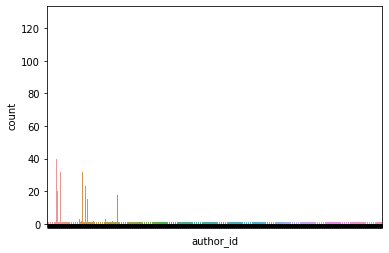

In [8]:
plot = sns.countplot(x='author_id', data=df_subset)
plot.set(xticklabels=[])

### Cleaning the Data

In [9]:
# Making all tweets lowercase
df_twitter['text'] = df_twitter["text"].str.lower()

# initializing stop words
nltk.download('stopwords')
stop_words = set(stopwords.words("english"))
nltk.download('punkt')

# initializing punctuations string
punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~‘'''


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\carol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\carol\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
# Creating function to create dataframe for each tweet, eliminating stop words and punctuation
# Please note the column name is the tweet_id name

df_tweets = pd.DataFrame()

def twitter_tweets(number_of_rows):
    for x in range(number_of_rows):
        tweet_filtered = []
        words_in_tweet = word_tokenize(df_twitter['text'][x])
        for w in words_in_tweet:
            if w not in stop_words:
                if w not in punc:
                    tweet_filtered.append(w)
        df_tweets[df_twitter['tweet_id'][x]] = pd.Series(tweet_filtered)

twitter_tweets(20000)


C:\Users\carol\AppData\Local\Temp/ipykernel_6836/380441510.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_tweets[df_twitter['tweet_id'][x]] = pd.Series(tweet_filtered)


In [11]:
# CSV file for tweets from function
print(df_tweets.shape)
df_tweets.to_csv('data/tweets.csv')

(12, 20000)


In [12]:
# Transpose the Twitter Dataframe for analysis
df_tweets_transpose = df_tweets.T
first_column = df_twitter['tweet_id'][:20000]
# insert column using insert(position,column_name,first_column) function
df_tweets_transpose.insert(0, 'Tweet_ID', first_column)
df_tweets_transpose.head(n=30)
df_tweets_transpose.to_csv('tweets_transpose.csv')

In [22]:
df_tweets = pd.read_csv('tweets.csv', usecols=range(2,2000))
print(df_tweets)
vectorizer = TfidfVectorizer(stop_words={'english'})
X = vectorizer.fit_transform(df_tweets)
print(X)
X.dtype

             2           3        4           5        6           8  \
0   sprintcare  sprintcare   115712  sprintcare   115712  sprintcare   
1      propose        sent   please         NaN   please       worst   
2          NaN     several     send         NaN     send    customer   
3          NaN     private       us         NaN       us     service   
4          NaN    messages  private         NaN  private         NaN   
5          NaN         one  message         NaN  message         NaN   
6          NaN  responding   assist         NaN     gain         NaN   
7          NaN       usual    click         NaN  details         NaN   
8          NaN         NaN  message         NaN  account         NaN   
9          NaN         NaN        ’         NaN      NaN         NaN   
10         NaN         NaN      top         NaN      NaN         NaN   
11         NaN         NaN  profile         NaN      NaN         NaN   

           11            12          15          16  ...      2

dtype('float64')

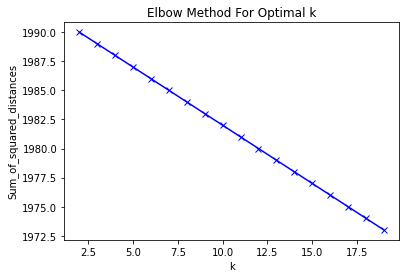

In [16]:
Sum_of_squared_distances = []
K = range(2,20)
for k in K:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10)
   km = km.fit(X)
   Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()